<a href="https://colab.research.google.com/github/imMohitSinha/Play_Store_App_review/blob/main/DatageniX_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## **PROCEDURE:**



*   Two datasets are given to us; one contains all the information about the app, and the other includes user reviews of the particular app. We are going to identify the essential elements that drive app engagement and success by analysing these two datasets.
*   In order to specify the content and datatype of each column, we must first investigate the types of data that are included in the dataset.
* The NaN and error values included in the dataset can be identified and dealt with once we have defined the contents of each column. Additionally, we may change the datatypes of the values in each column by looking at their datatypes and converting them.
* Now that we have analysed the data pipeline, we may create several visualisations.
* We can get insights and the elements crucial to an app's success from the visualizations.







## **DATA FROM PLAYSTORE ANALYSIS**

In [ ]:
# Importing the necessary libraries so that the csv files can be read

import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_data_path = '/content/drive/MyDrive/Colab Notebooks/EDA_Capstone_Project_Play_Store_Review'

In [ ]:
# Reading the csv file

play_store_data = '/content/drive/MyDrive/Colab Notebooks/EDA_Capstone_Project_Play_Store_Review/Play Store Data.csv'
play_store_reading = pd.read_csv(play_store_data)

In [ ]:
# Displaying the imported dataframe's first 5 rows.

play_store_reading.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Determining the dataset's number of rows and columns

play_store_reading.shape

(10841, 13)

In [ ]:
# Play Store dataset columns are

play_store_reading.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# **Let's first describe the data that the columns, based on our assessment, contain.**

* **App**: Contains a brief description along with the app's name (optional).
* **Category**: It provides the app with a category.
* **Rating**: It includes the overall score that users of the relevant app gave it.
* **Reviews**: It includes the total number of people who have left feedback for the relevant app.
* **Size**: It includes the amount of disc space needed to install the specific application.
* **Installs**: It provides a rough estimate of how many times the relevant app was downloaded.
* **Type**: Indicates whether an app is a paid or free download.
* **Price**: It provides the installation fee for the app. The cost is 0 for apps of the free variety.
* **Content**: A content rating indicates whether or not an app is appropriate for users of all ages.
* **Genre**:The genre(s) to which the particular app belongs are indicated.
* **Last Update**: It indicates the day that the most recent update was published.
* **Current Version**: It provides the app's most recent version.
* **Android Version**: It provides the relevant app's android version.





# **Processing the Play Store data's NaN values**

In [ ]:
# We need to find the number of NaN values in each column.

play_store_reading.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## **Let's attempt to handle each column of NaN values individually.**

Now, let's calculate the percentage of rows with at least one NaN value.

In [ ]:
# Percentage of rows with at least one NaN value.

total_nan_values = sum([True for id,row in play_store_reading.iterrows() if any(row.isnull())])
percentage_nan_values = round(total_nan_values/10841*100, 2)
print(f'Hence, there are a total of {total_nan_values}({percentage_nan_values}%) rows which contain atleast one NaN value.')

Hence, there are a total of 1481(13.66%) rows which contain atleast one NaN value.


It is not practical to delete all the rows with NaN values because roughly 13.66 % of all the dataset's rows contain at least one such value. We need to approach this issue differently.

**Let's start by addressing the columns that have the fewest NaN values. We need to find a means to replace the NaN values with non-NaN values or provide a justification for why they exist by going through the NaN values.**

**1. Android Version: This column has a total of 3 NaN values.**

In [ ]:
play_store_reading[play_store_reading['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**Analysis:**
* The **Android Ver** column has a total of 3 items with NaN values.
* The row corresponding to index number 10472 contains numerous mistakes. For instance, the **Category** contains the value "1.9," which makes no sense, the Rating is "19," which cannot be real because app reviews on the Play Store can only range from 1 to 5, and so on. Therefore, it is in our best interest to delete this entry from altogather in order to prevent any errors from occurring when we carry out the analysis.

In [ ]:
# Finding the different values required by the "Android Version" column.

play_store_reading['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

Since there is no value that can be used to replace the NaN values in the Android Version column and there are only 3 rows in the given dataset that have these values, or less than 0.03% of all rows, it is possible to remove this column.

In [ ]:
# Rows corresponding to the NaN values in the "Android Ver" column are dropped.

play_store_reading = play_store_reading[play_store_reading['Android Ver'].notna()]

In [ ]:
# The revised dataframe's shape

play_store_reading.shape

(10838, 13)

In [ ]:
# values for NaN in each column

play_store_reading.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
dtype: int64

**Analysis**: In the **Android Ver** column, we handled the NaN values without incident.

**2. Current Version: This column contains a total of 8 NaN values.**

In [ ]:
# The rows where the 'Current Ver' column contains NaN values.

play_store_reading[play_store_reading['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [ ]:
# Finding the various values for the "Current Ver" column requires.

play_store_reading['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    263
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

**Analysis**: Since there are only 8 rows in the supplied dataset having NaN values in the Current Ver column, or about 0.07% of all the rows, and since there is no suitable replacement value, these rows can be discarded.

In [ ]:
# Removing rows matching to values in the "Current Ver" column that include NaN.

play_store_reading = play_store_reading[play_store_reading['Current Ver'].notna()]

In [ ]:
# NaN values in each column

play_store_reading.isnull().sum()

App                  0
Category             0
Rating            1470
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [ ]:
# The revised dataframe's shape

play_store_reading.shape

(10830, 13)

**Analysis**: In the Current Ver column, we handled the NaN values without incident.

**3. Type: This column has a single NaN value.**

In [ ]:
# The row containing NaN values in the Type column

play_store_reading[play_store_reading['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
# Finding the various values that the "Type" column accepts

play_store_reading['Type'].value_counts()

Free    10032
Paid      797
Name: Type, dtype: int64

**Analysis**: There are just two entries in the Type column: Free and Paid. Additionally, the price of the app will be shown in the appropriate Price column if it is a paid app; otherwise, it will display as "0". In this instance, the price for the relevant app is written as "0," indicating that the app has no text. Therefore, Free can be used in place of this NaN value.

In [ ]:
# Substituting "Free" for the NaN value in the "Type" column corresponding to row index 9148.

play_store_reading.loc[9148,'Type'] = 'Free'

In [ ]:
# Finding the different values the 'Type' column takes

play_store_reading['Type'].value_counts()

Free    10033
Paid      797
Name: Type, dtype: int64

In [ ]:
# NaN values in each column

play_store_reading.isnull().sum()

App                  0
Category             0
Rating            1470
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [ ]:
# The revised dataframe's shape

play_store_reading.shape

(10830, 13)

**Analysis**: In the "Type" column, we were able to effectively handle the NaN values.

**4. Content Rating: This column has a single NaN value**

**5. Rating: There are 1470 NaN values in this column.**

In [ ]:
# The rows where the Rating column contains NaN values.

play_store_reading[play_store_reading['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Additionally, we are aware that every software in the Google Play store will have a rating between 1 and 5. Let's see if any ratings go outside of this range.

In [ ]:
play_store_reading[(play_store_reading['Rating'] <1) | (play_store_reading['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


**Analysis**: We can continue because there are no errors of this nature.

* About 13.5 percent of the rows in the overall dataset—1470 NaN values—are found in the Rating column. Dropping these rows would result in a significant loss of data, which could have an adverse effect on the analysis's overall quality. Therefore, doing so is not viable.

* The sum (mean or median) of the remaining values in the Rating column can be used to impute the NaN values in this situation.

In [ ]:
# Taking the NaN values out when calculating the mean and median in the Rating column.

mean_score = round(play_store_reading[~play_store_reading['Rating'].isnull()]['Rating'].mean(),1)

median_score = play_store_reading[~play_store_reading['Rating'].isnull()]['Rating'].median()

[mean_score, median_score]


[4.2, 4.3]

### **Now let's illustrate this using a Boxplot and a Distplot**

In [ ]:
# Importing the required libraries

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

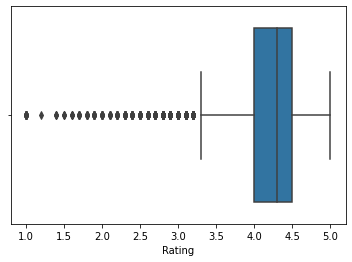

In [ ]:
# Boxplot - a measure of how well distributed the data in a data set is. 

sns.boxplot(data = play_store_reading['Rating'],x = play_store_reading['Rating'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


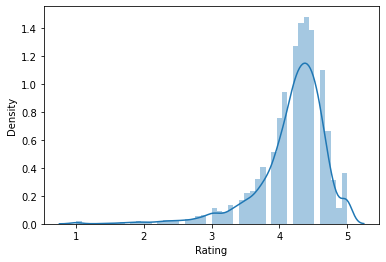

In [ ]:
# Displot - represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

sns.distplot(play_store_reading['Rating'])

* Without including NaN values, the average ratings' mean is calculated to be 4.2.
* The median of the items in the "Rating" column (excluding the NaN values) works out to be 4.3. This indicates that 50% of the apps have an average rating above 4.3 and the other 50% have a rating below 4.3.
* The ratings are left biassed, as seen in the distplot representations.
* We are aware that if a variable is skewed, the values at the extreme ends of the distribution will affect the mean. As a result, the median provides a more accurate depiction of the vast majority of values in the variable.
* Therefore, we will use its median to impute the NaN values in the Rating column.

In [ ]:
# Changing the median value of the "Rating" column to replace any NaN values.

play_store_reading['Rating'].fillna(value=median_score, inplace=True)

In [ ]:
# NaN values in each column

play_store_reading.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
# Verifying the median value in the "Rating" column.

play_store_reading['Rating'].median()

4.3

In [ ]:
# The revised dataframe's shape

play_store_reading.shape

(10830, 13)

**Analysis**: After imputing the NaN values in the Rating column, 10830 rows are the final number.

# **Handling the Play Store data's error values:**

In [ ]:
play_store_reading.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**1. Converting the Last Updated column's string datatype to datetime.**

In [ ]:
# values taken by the last updated column

play_store_reading['Last Updated'].value_counts()

August 3, 2018        326
August 2, 2018        304
July 31, 2018         294
August 1, 2018        285
July 30, 2018         211
                     ... 
April 7, 2015           1
September 22, 2014      1
October 3, 2015         1
March 13, 2015          1
March 23, 2014          1
Name: Last Updated, Length: 1376, dtype: int64

In [ ]:
# The datetime.strptime function was used to change the datatype from string to datetime for the values in the last updated column.

play_store_reading['Last Updated'] = play_store_reading['Last Updated'].apply(lambda x: datetime.strptime(x,'%B %d, %Y'))
play_store_reading.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
play_store_reading.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10830 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10830 non-null  object        
 1   Category        10830 non-null  object        
 2   Rating          10830 non-null  float64       
 3   Reviews         10830 non-null  object        
 4   Size            10830 non-null  object        
 5   Installs        10830 non-null  object        
 6   Type            10830 non-null  object        
 7   Price           10830 non-null  object        
 8   Content Rating  10830 non-null  object        
 9   Genres          10830 non-null  object        
 10  Last Updated    10830 non-null  datetime64[ns]
 11  Current Ver     10830 non-null  object        
 12  Android Ver     10830 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1.4+ MB


**Analysis:** The values in the Last updated column were successfully changed from the string datatype to the datetime datatype.

**2. Dealing with the repeated entries in the App column**

In [ ]:
play_store_reading['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

In [ ]:
# Examining the duplicate values.

play_store_reading[play_store_reading['App'] == 'Candy Crush Saga']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up
1705,Candy Crush Saga,GAME,4.4,22428456,74M,"500,000,000+",Free,0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up
1751,Candy Crush Saga,GAME,4.4,22428456,74M,"500,000,000+",Free,0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up
1842,Candy Crush Saga,GAME,4.4,22429716,74M,"500,000,000+",Free,0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up
1869,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up
1966,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up
3994,Candy Crush Saga,FAMILY,4.4,22419455,74M,"500,000,000+",Free,0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up


In [ ]:
# Examining the duplicate values.

play_store_reading[play_store_reading['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


In [ ]:
# Removing redundant entries from the "App" column.

play_store_reading.drop_duplicates(subset = 'App', inplace = True)


In [ ]:
# Verifying whether or not the duplicates in the "App" column have been removed.

play_store_reading['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
INFAMY RO                                         1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
CK Shop                                           1
                                                 ..
Block City Wars + skins export                    1
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9649, dtype: int64

In [ ]:
# Examining the revised dataset's shape.

play_store_reading.shape

(9649, 13)

In [ ]:
# Verifying that the duplicates from the aforementioned examples have been eliminated

play_store_reading[play_store_reading['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


In [ ]:
# Verifying the removal of duplicates from the aforementioned examples

play_store_reading[play_store_reading['App'] == '8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up


In [ ]:
play_store_reading.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


**Analysis:** Every instance of a duplicate value in the App column has been dealt with satisfactorily. After eliminating the duplicate rows from the app column, there are 9649 remaining records.

**3. Changing the Price column's datatype from string to float.**

In [ ]:
play_store_reading['Price'].value_counts()

0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

**Analysis:** We must remove the $ symbol from all of the values before changing this column from a string to a float. After that, we may give those values the float datatype.

In [ ]:
# Creating a function called dollar_drop that removes the dollar sign ($) if it appears and returns an output with float datatype.


def dollar_drop(val):
  '''
  This funtion drops the $ symbol if present and returns the value with float datatype.
  '''
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

**Analysis:** using the dollar_drop function to change the Price column's values from string to float datatypes.

In [ ]:
# The price column was assigned to the dollar_drop function.


play_store_reading['Price'] = play_store_reading['Price'].apply(lambda x: dollar_drop(x))
play_store_reading.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
play_store_reading[play_store_reading['Price'] != 0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up


In [ ]:
play_store_reading.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   object        
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 1.0+ MB


**Analysis:** The datatype of the values in the Price column has been successfully changed from string to float.

**4. Changing the Installs column's values from string to integer datatype.**

In [ ]:
# Examining the data in the "Installs" column

play_store_reading['Installs'].value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

**Analysis:** If the "+" sign is present, we must first remove it from every entry before we can change the datatype of the Installs column's values from string to integer.

In [ ]:
# Making a function called drop plus that, if it finds the plus sign, removes it and provides output with an integer datatype.

def drop_plus(val):
  '''
  If the + sign is present, it is removed by this function, which returns a result with an int datatype.
  '''
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)

**Analysis:** Applying the drop_plus function to change the string datatype of the entries in the Installs column to a float datatype.

In [ ]:
# The primary dataframe was used with the drop_plus function.

play_store_reading['Installs'] = play_store_reading['Installs'].apply(lambda x: drop_plus(x))
play_store_reading.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


**Analysis:** The integer datatype resulting values in the Installs column indicate the least number of times a specific program has been installed.


* Installs = 0 denotes that nobody has yet installed that specific software.
* Installs = 1 means that at least one person has downloaded the specific application.
* Installs = 1000000 means that at least one million users have downloaded this particular software. 



In [ ]:
play_store_reading.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.0+ MB


**Analysis:** The datatype of the values in the Installs column has been successfully changed from string to int.

**5. Changing the Size column's values to the same unit of measurement (MB).**

In [ ]:
play_store_reading['Size'].value_counts()

Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

**Analysis:** We can see that the Size column's values contain information with a variety of units. M and K stand for MB and KB, respectively. It is required to convert all the values to a single unit in order to quickly analyse this column. In this instance, we'll convert every unit to megabytes (MB).

Since 1MB = 1024KB, we can convert KB to MB by multiplying all of the KB numbers by 1024.

In [ ]:
# Creating a function that will convert every entry from KB to MB and then to the float datatype.

def kb_to_mb(val):
  '''
  The function returns the result as a float datatype after converting all of the valid KB elements to MB.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

**Analysis:**  Applying the kb to mb function to change the datatype from string to float and the values in the Size column to a single unit of measurement (MB).

In [ ]:
# The kb_to_mb funtion applied to the size column

play_store_reading['Size'] = play_store_reading['Size'].apply(lambda x: kb_to_mb(x))
play_store_reading.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
# Verifying values in the revised dataframe's size column

play_store_reading['Size'].value_counts()

Varies with device    1227
12.0                   181
11.0                   181
13.0                   177
14.0                   176
                      ... 
0.7041                   1
0.4199                   1
0.4189                   1
0.1953                   1
0.6045                   1
Name: Size, Length: 456, dtype: int64

**Analysis:** The entry varies with device appears in the vast majority of entries in the Size column. Let's check if it can be imputed with the mean or median value of the entries in this column as this entry cannot be used for analysis.

In [ ]:
# Finding the maximum, minimum, mean, and median in the Size column while leaving out the values for "Varies with device."

max_size = play_store_reading[play_store_reading['Size'] != 'Varies with device']['Size'].max()

min_size = play_store_reading[play_store_reading['Size'] != 'Varies with device']['Size'].min()

mean_size = round(play_store_reading[play_store_reading['Size'] != 'Varies with device']['Size'].mean(),4)

median_size = play_store_reading[play_store_reading['Size'] != 'Varies with device']['Size'].median()

[max_size, min_size, mean_size, median_size]

[100.0, 0.0083, 20.4136, 12.0]

### **Let's use a boxplot and a distplot to illustrate the data in the size column.**

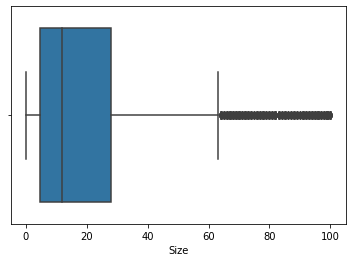

In [ ]:
# Boxplot

sns.boxplot(data = play_store_reading[play_store_reading['Size'] != 'Varies with device']['Size'], x= play_store_reading[play_store_reading['Size'] != 'Varies with device']['Size'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


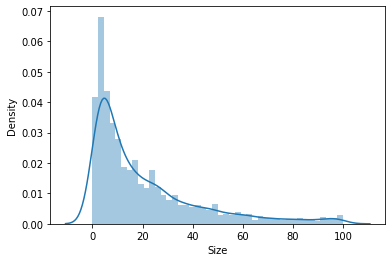

In [ ]:
# Distplot

sns.distplot(play_store_reading[play_store_reading['Size'] != 'Varies with device']['Size'])

* The visualisations make it obvious that the Size column's data is skewed to the left.
* Additionally, we can see that the bulk of the entries in this column have the value Varies with device; substituting any other central tendency value (such as mean or median) for this one could provide inaccurate visualisations and results. As a result, these values remain the same.

In [ ]:
play_store_reading.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.0+ MB


**Analysis:** We have successfully changed the datatype from string to float and all the valid entries in the "Size" column to a single unit of measurement (MB).

**6. Changing the Reviews column's contents from string to int datatype.**

In [ ]:
# Changing the reviews column's values' datatype from string to int

play_store_reading['Reviews'] = play_store_reading['Reviews'].astype(int)
play_store_reading.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
play_store_reading.describe()

,Rating,Reviews,Installs,Price
count,9649.000000,9.649000e+03,9.649000e+03,9649.000000
mean,4.192476,2.168145e+05,7.785404e+06,1.100079
std,0.496528,1.832255e+06,5.378557e+07,16.860857
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,1.000000e+05,0.000000
75%,4.500000,2.944500e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [ ]:
play_store_reading.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int64         
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.0+ MB


**Analysis:** The datatype of the values in the Reviews column has been successfully changed from string to int.

### **Now let's handle the mistakes and NaN values in the userreviews.csv file in the same manner as we did with the playstoredata.csv file.**

# **Exploring User Reviews:**

In [ ]:
# The userreviews.csv file is being read.

user_review_data = '/content/drive/MyDrive/Colab Notebooks/EDA_Capstone_Project_Play_Store_Review/User Reviews.csv'

user_review_dataframe = pd.read_csv(user_review_data)

In [ ]:
# Verifying the data's top 5 rows

user_review_dataframe.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# The dataframe's shape

user_review_dataframe.shape

(64295, 5)

**Analysis:** There are 64295 rows of data in the dataframe.

In [ ]:
# Dataframe's Columns

user_review_dataframe.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
# Verifying the sentiment column's values

user_review_dataframe['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

In [ ]:
# Describing the dataframe

user_review_dataframe.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### **Let's first describe the data that the columns, based on our assessment, contain.**

* **App:** Contains a brief description along with the app's name (optional).
* **Translated Review:** This file provides the English translation of the app user's review that was left.
* **Sentence:** It expresses the author's mood or attitude. Positive, negative, or neutral are all possible outcomes.
* **Sentiment Polarity:** It indicates the review's polarity. The range of this variable is [-1,1], where 1 denotes a "Positive statement" and -1 denotes a "Negative statement."
* **Sentiment Subjectivity:** This indicator shows how closely a reviewer's viewpoint aligns with the broader public's opinion. [0, 1] is its range. Higher subjectivity indicates that the reviewer's opinion is more in line with the general public's opinion, while lower subjectivity suggests that the review is more of a factual report.

# **Error handling and NaN values in user reviews:**

In [ ]:
# Counting the number of NaN values in all the columns.

user_review_dataframe.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

**Analysis:** There are numerous values for NaN. We must examine these values and determine how to manage them.

In [ ]:
# Verifying the translated review column's NaN values

user_review_dataframe[user_review_dataframe['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


**Analysis:** The Translated Review column has a total of 26868 rows with NaN values.

We may infer that the majority of the time, the columns Sentiment, Sentiment Polarity, and Sentiment Subjectivity contain NaN values for the apps that do not have reviews (NaN value instead).

Let's investigate any potential exceptions.

In [ ]:
# The rows when the translated review field has NaN values while the other columns contain non-null values.

user_review_dataframe[user_review_dataframe['Translated_Review'].isnull() & user_review_dataframe['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


**Analysis:** There appear to be issues in the rare extreme situations where the Translated_Review field has null values but the values of the remaining columns are not null. This is because only if there is a related review can the sentiment, sentiment polarity, and sentiment subjectivity of the review be determined.

Therefore, these numbers are incorrect and can be completely erased.

In [ ]:
# Eliminating the rows with NaN values

user_review_dataframe = user_review_dataframe.dropna()

In [ ]:
# The revised dataframe's form

user_review_dataframe.shape

(37427, 5)

**Analysis:** The updated dataframe contains 37427 rows altogether.

As a result, we have dealt with all of the NaN values in the dataframe.

### **Let's examine the revised dataframe.**

In [ ]:
# Examining the sentiment column

user_review_dataframe['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

In [ ]:
user_review_dataframe[user_review_dataframe['Sentiment'] == 'Negative'].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500,0.500
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200,0.000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200,0.000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800,0.800
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325,0.475


In [ ]:
user_review_dataframe[user_review_dataframe['Sentiment'] == 'Neutral'].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
8,10 Best Foods for You,"Looking forward app,",Neutral,0.0,0.0
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.0,0.0
22,10 Best Foods for You,God health,Neutral,0.0,0.0
25,10 Best Foods for You,I found lot wealth form health...,Neutral,0.0,0.0
29,10 Best Foods for You,On test....,Neutral,0.0,0.0


In [ ]:
user_review_dataframe.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


**Analysis:** Sentiment_Polarity and Sentiment_Subjectivity values appear to be accurate.

We created a data pipeline with the datasets provided. This data flow may now be examined, and user-friendly graphics can be produced. The visualisations make it simple to compare various metrics and take conclusions from them.

# **Data Visualization on Play Store data:**

The unclean data has successfully been cleared. Now that the datasets have been provided, we may visualise the data and get insights from it.

**1. Correlation Heatmap**

In [ ]:
# Finding correlations between several columns of the data from the play store

play_store_reading.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.050212,0.034306,-0.018674
Reviews,0.050212,1.000000,0.625158,-0.007603
Installs,0.034306,0.625158,1.000000,-0.009412
Price,-0.018674,-0.007603,-0.009412,1.000000


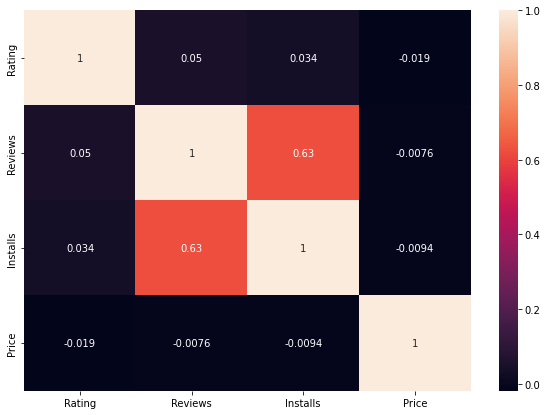

In [ ]:
# Correlation heatmap

plt.figure(figsize = (10,7))
sns.heatmap(play_store_reading.corr(), annot= True)

**Analysis:**

* The "Reviews" and "Installs" columns have a very significant positive association. This is essentially evident. The number of instals, user base, and overall reviews dropped by users all increase as the number of instals increases.
* The relationships between the "Price" and the "Rating," "Reviews," and "Installs" are somewhat inverse. This translates to a minor decline in the average rating, overall number of reviews, and instals when the app's price rises.
* The "Rating" column and the "Installs" and "Reviews" columns have a minor positive correlation. This suggests that as the average user rating rises, so do the number of app instals and reviews.

**2. Percentage of free and paid apps in the database**

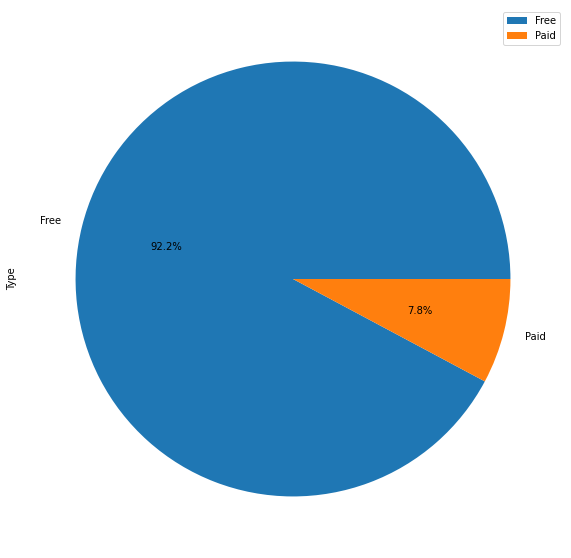

In [ ]:
# Pie chart indicating the app's category

play_store_reading['Type'].value_counts().plot.pie(figsize = (10,10), autopct='%1.1f%%')
plt.legend()

**Analysis:** Most of the apps in the Play Store are of the free variety.

**3. Content rating**

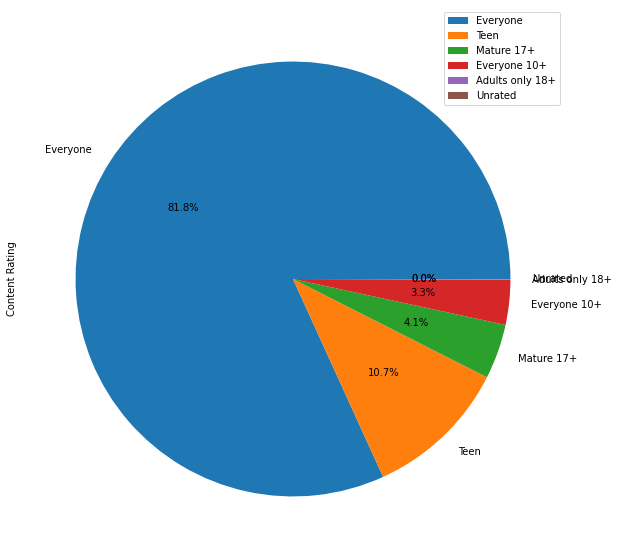

In [ ]:
# Apps' content ratings

play_store_reading['Content Rating'].value_counts().plot.pie(figsize = (10,10), autopct='%1.1f%%')
plt.legend()

**Analysis:** 81.8 % of the apps in the Google Play store are universally usable. The remaining apps all have different usage restrictions based on age.

**4. Number of apps present in each category.**

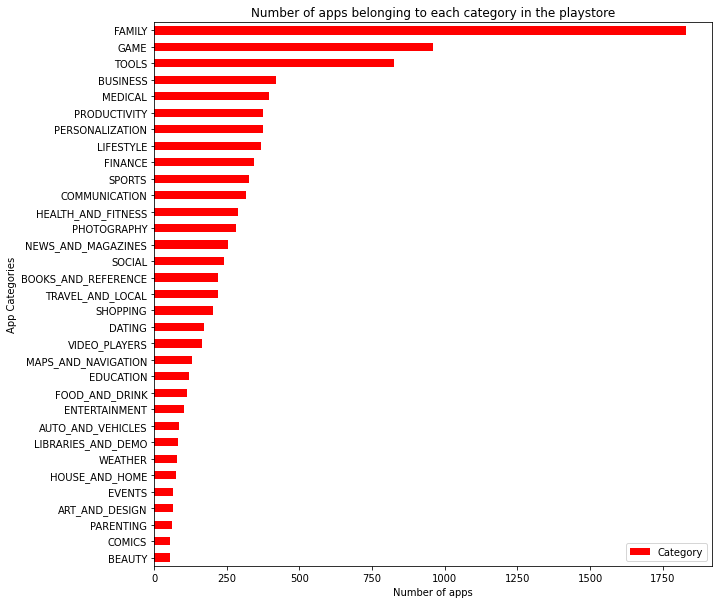

In [ ]:
# No. of apps in each category

play_store_reading['Category'].value_counts().plot.barh(figsize=(10,10), color = 'r').invert_yaxis()
plt.ylabel('App Categories')
plt.xlabel('Number of apps')
plt.title('Number of apps belonging to each category in the playstore')
plt.legend()

**Analysis:** This visualisation demonstrates how competitive an app store category is. In comparison to other categories, the Family, Game, and Tools categories have the most apps.

**5. Total app installs in each category**

Text(0.5, 1.0, 'Total app installs in each category')

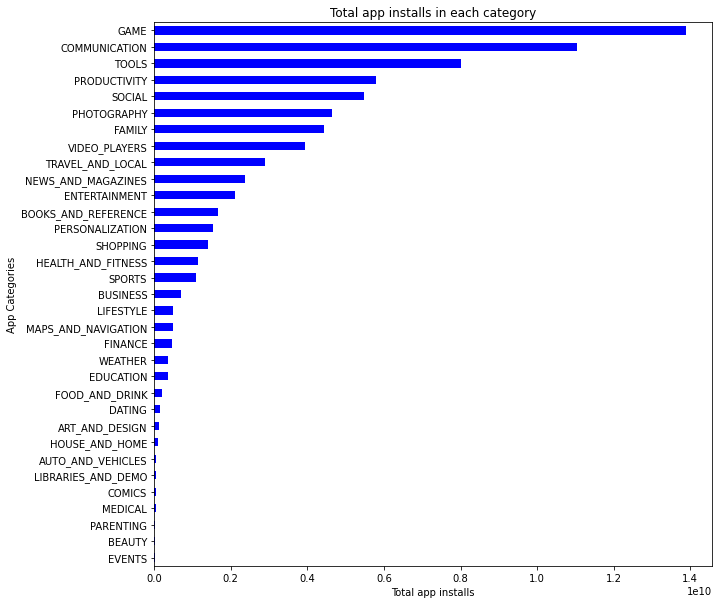

In [ ]:
# Total number of apps installed in each play store category

a = play_store_reading.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(10,10), color = 'b')
plt.xlabel('Total app installs')
plt.ylabel('App Categories')
plt.xticks()
plt.title('Total app installs in each category')

**Analysis:** This information reveals the app category with the greatest amount of instals. When compared to other app categories, the Game, Communication, and Tools categories have the most instals.

**6. Average number of app installs in each category**

Text(0.5, 1.0, 'Average number of app installs in each category')

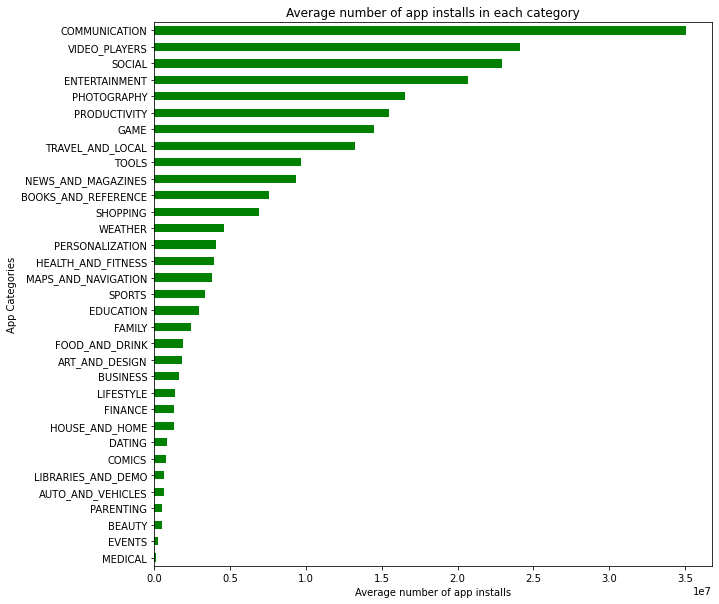

In [ ]:
# Average number of app instals across all Play Store categories

a = play_store_reading.groupby(['Category'])['Installs'].mean().sort_values()
a.plot.barh(figsize=(10,10), color = 'g')
plt.xlabel('Average number of app installs')
plt.ylabel('App Categories')
plt.xticks()
plt.title('Average number of app installs in each category')

**Analysis:** The average number of installs for an app in each category are shown in this visualisation. In comparison to apps in other categories, the Communication, Video players, and Social categories have the most average installs.

**7. Average rating of the apps**

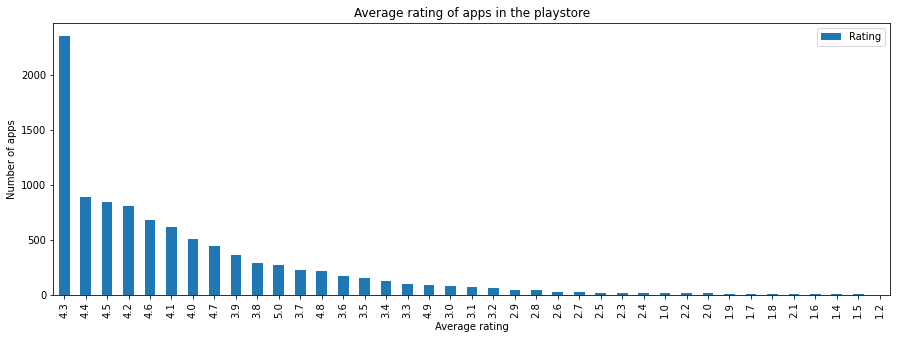

In [ ]:
# Average app ratings

play_store_reading['Rating'].value_counts().plot.bar(figsize=(15,5) )
plt.xlabel('Average rating')
plt.ylabel('Number of apps')
plt.title('Average rating of apps in the playstore')
plt.legend()

**Analysis:**

If we divide the ratings into intervals, we can better represent the ratings. Here, the ratings can be categorised as follows:

* 4-5: Top rated
* 3–4: Sufficiently high
* 2-3: Standard
* 1-2: Poor performance

**Let's add these filters and a new column called Rating group to the main dataframe.**

In [ ]:
# Creating the function grouped_rating to organise the ratings as previously indicated.

def grouped_rating(val):
  '''
  This function categorizes the ratings between 1 and 5 among 
  top rated, above average, average, and below average.
  '''
  if val>=4:
    return 'Top Rated'
  elif val>=3 and val<4:
    return 'Above Average'
  elif val>=2 and val<3:
    return 'Average'
  else:
    return 'Below Average'

**Analysis:** Now let's use the grouped_rating function on the Rating column and save the results in a new column in the main dataframe called Rating group.

In [ ]:
# Applying grouped_rating function

play_store_reading['Rating Group'] = play_store_reading['Rating'].apply(lambda x: grouped_rating(x))

In [ ]:
play_store_reading.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Group
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Top Rated
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Above Average
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Top Rated
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Top Rated
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Top Rated


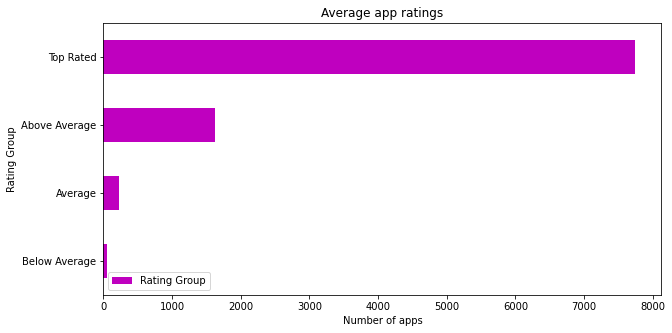

In [ ]:
# Average app ratings 


play_store_reading['Rating Group'].value_counts().plot.barh(figsize=(10,5), color = 'm').invert_yaxis()
plt.ylabel('Rating Group')
plt.xlabel('Number of apps')
plt.title('Average app ratings')
plt.xticks(rotation=0)
plt.legend()

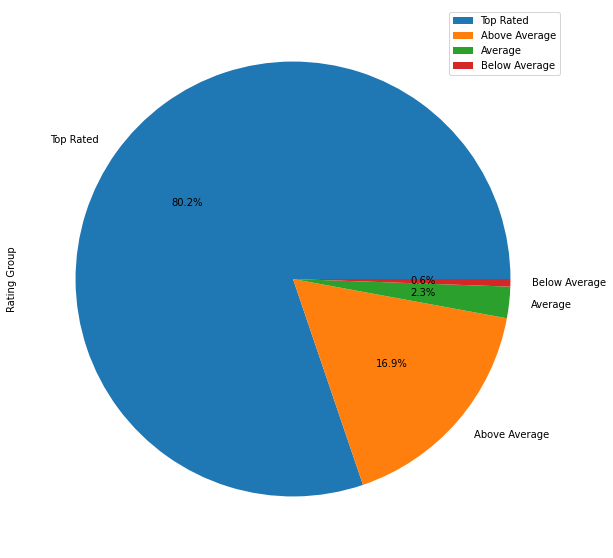

In [ ]:
# App rating 

play_store_reading['Rating Group'].value_counts().plot.pie(figsize = (10,10), autopct='%1.1f%%')
plt.legend()

**Analysis:** The majority of the apps in the app store are Top rated.

**8. Top apps that are of free type.**

In [ ]:
# Making a dataframe that exclusively contains free apps

free_dataframe = play_store_reading[play_store_reading['Type'] == 'Free']

In [ ]:
# Making a list of the best free apps.

top_free_dataframe = free_dataframe[free_dataframe['Installs'] == free_dataframe['Installs'].max()]
top_free_dataframe

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Group
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device,Above Average
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Top Rated
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,Top Rated
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Top Rated
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,Top Rated
341,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,Top Rated
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,Top Rated
865,Google Play Games,ENTERTAINMENT,4.3,7165362,Varies with device,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device,Top Rated
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,Top Rated
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,Top Rated


In [ ]:
top_free_dataframe.shape

(20, 14)

In [ ]:
# Top Free App

top_free_dataframe['App']

152                            Google Play Books
335     Messenger – Text and Video Chat for Free
336                           WhatsApp Messenger
338                 Google Chrome: Fast & Secure
340                                        Gmail
341                                     Hangouts
391                Skype - free IM & video calls
865                            Google Play Games
1654                              Subway Surfers
2544                                    Facebook
2545                                   Instagram
2554                                     Google+
2808                               Google Photos
3117                   Maps - Navigate & Explore
3127                          Google Street View
3234                                      Google
3454                                Google Drive
3665                                     YouTube
3687                     Google Play Movies & TV
3736                                 Google News
Name: App, dtype: ob

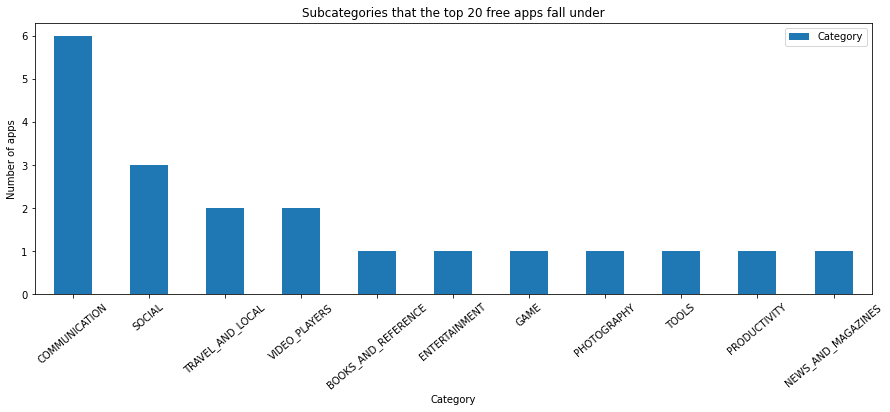

In [ ]:
# Subcategories that the top 20 free apps fall under

top_free_dataframe['Category'].value_counts().plot.bar(figsize=(15,5))
plt.xlabel('Category')
plt.ylabel('Number of apps')
plt.title('Subcategories that the top 20 free apps fall under')
plt.xticks(rotation=40)
plt.legend()

**9. Top apps that are of paid type.**

In [ ]:
# Making a dataframe that only contains premium apps

paid_dataframe = play_store_reading[play_store_reading['Type'] == 'Paid']
paid_dataframe.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Group
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,Top Rated
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,Top Rated
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,Top Rated
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,Top Rated
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,Average


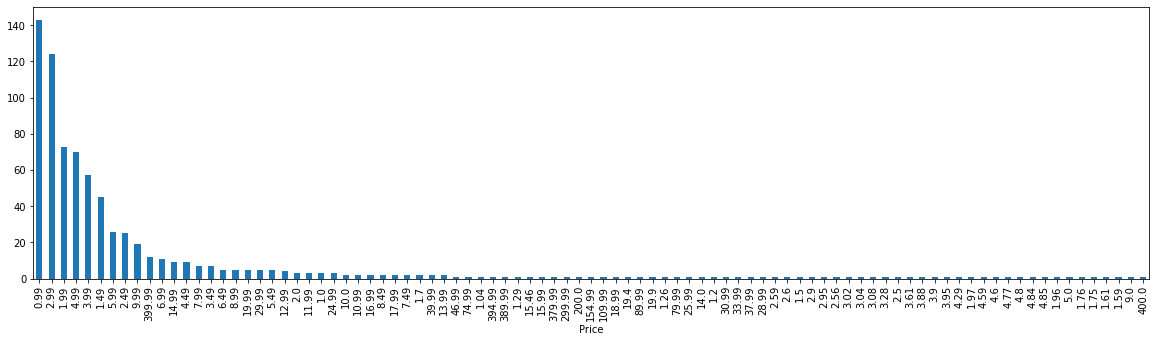

In [ ]:
# The number of applications that can be installed at a given pricing

paid_dataframe.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,5))

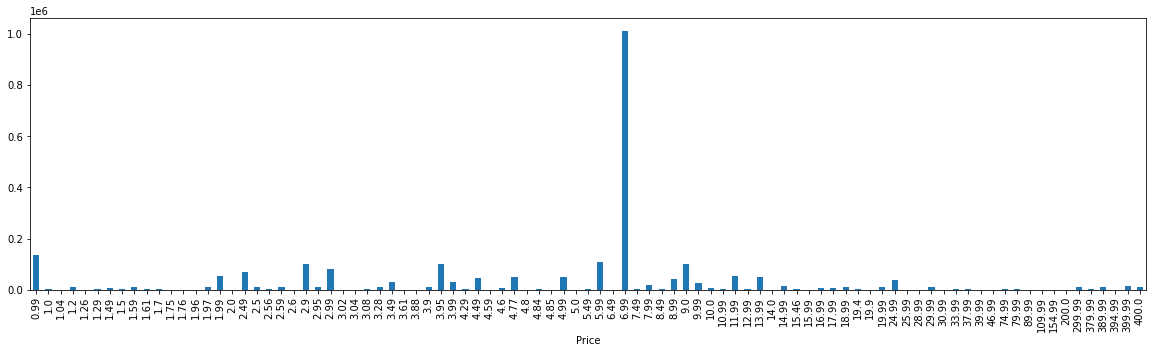

In [ ]:
# Average number of installed paid apps

paid_dataframe.groupby('Price')['Installs'].mean().plot.bar(figsize=(20,5))

**Analysis:**

* Users must pay a set amount to download and install the premium apps. The amount changes depending on the app.

* There are several apps that only cost a modest amount, while some charge more. Here, the cost to download an app ranges from USD 0.99 to USD 400.

* It wouldn't be fair to only consider the number of installs when choosing the best paid apps. This is due to the fact that a larger population will generally install programmes with cheaper installation costs.

* Finding the income an app produced from app installs is a better technique to identify the top applications in the paid category in this case.

* It is provided by: Revenue generated through installs = (Number of installs)x(Price to install the app)


### **Now, let's create a new column in paid dataframes called Revenue that shows the revenue the app generates from only installs.**

In [ ]:
# Adding a new column in paid dataframe called "Revenue"

paid_dataframe['Revenue'] = paid_dataframe['Installs']*paid_dataframe['Price']
paid_dataframe.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Group,Revenue
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,Top Rated,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,Top Rated,499000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,Top Rated,399000.0
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,Top Rated,39900.0
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,Average,6990.0


In [ ]:
#No.1 in the premium category for apps

paid_dataframe[paid_dataframe['Revenue'] == paid_dataframe['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Group,Revenue
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,Top Rated,69900000.0


In [ ]:
# Play Store's top 20 paid applications

top_paid_dataframe = paid_dataframe.nlargest(20, 'Revenue')
top_paid_dataframe['App']

2241                                           Minecraft
5351                                           I am rich
5356                                   I Am Rich Premium
4034                                       Hitman Sniper
7417                       Grand Theft Auto: San Andreas
2883                                 Facetune - For Free
5578                             Sleep as Android Unlock
8804                                 DraStic DS Emulator
4367                            I'm Rich - Trump Edition
4362                                          💎 I'm rich
5354                                      I am Rich Plus
5366                                           I Am Rich
5355                                       I am rich VIP
4133                                        Weather Live
2242                          Card Wars - Adventure Time
5631                             Five Nights at Freddy's
7355                                             Threema
8860                           

In [ ]:
top_paid_dataframe.shape

(20, 15)

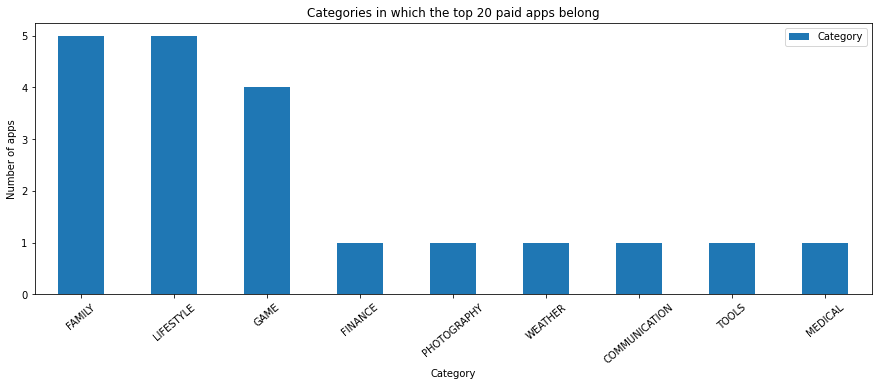

In [ ]:
# Subcategories that the top 20 paid applications fall under

top_paid_dataframe['Category'].value_counts().plot.bar(figsize=(15,5))
plt.xlabel('Category')
plt.ylabel('Number of apps')
plt.title('Categories in which the top 20 paid apps belong')
plt.xticks(rotation=40)
plt.legend()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


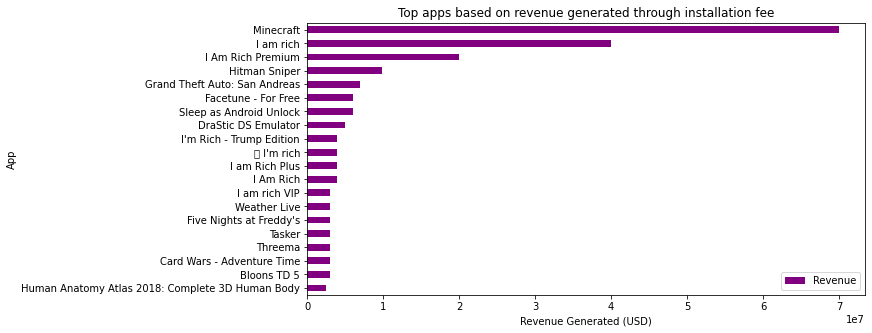

In [ ]:
# Top paid applications based solely on revenue from installs

top_paid_dataframe.groupby('App')['Revenue'].mean().sort_values().plot.barh(figsize=(10,5), color = 'Purple')
plt.xlabel('Revenue Generated (USD)')
plt.title('Top apps based on revenue generated through installation fee')
plt.legend()

In [ ]:
# Paid applications with the most downloads

paid_dataframe[paid_dataframe['Revenue'] == paid_dataframe['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Group,Revenue
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,Top Rated,69900000.0


**Analysis:** Only one paid app has more than 10 million downloads.

**10. Average price of paid apps in each category**

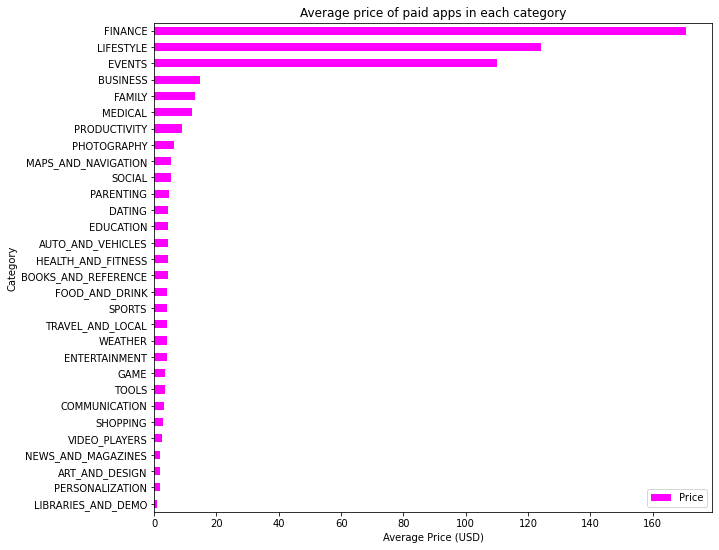

In [ ]:
# The average cost of purchased apps across all categories

paid_dataframe.groupby('Category')['Price'].mean().sort_values(ascending=False).plot.barh(figsize = (10,9), color='Magenta').invert_yaxis()
plt.xlabel('Average Price (USD)')
plt.title('Average price of paid apps in each category')
plt.legend()

**11. Top 20 apps with the highest number of user reviews**

Text(0.5, 1.0, 'Top 20 apps with the highest number of user reviews')

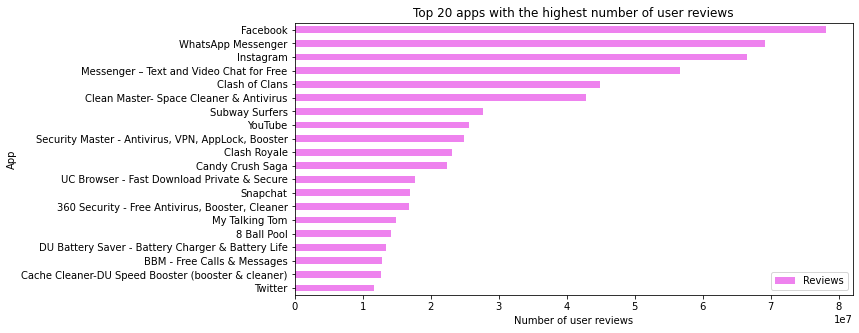

In [ ]:
# Popular apps with the most user reviews

play_store_reading.groupby('App')[['Reviews','App']].sum().nlargest(20,['Reviews']).plot.barh(figsize = (10,5), color = 'Violet').invert_yaxis()
plt.xlabel('Number of user reviews')
plt.title('Top 20 apps with the highest number of user reviews')

**Analysis:** We can infer that the Play Store's most downloaded apps are those with the most user reviews.

**12. Distribution of apps based on its size**

In [ ]:
# Values determined previously

max_size,min_size,mean_size,median_size

(100.0, 0.0083, 20.4136, 12.0)

**Analysis:**

* In our database, apps range in size from 100 MB to 0.0083 MB. If we can divide the apps into discrete intervals, we can analyse their sizes.
* The numeric values in the "Size" column are skewed to the left, as we've already discovered.
* Let's divide the data in the size column into intervals of 10 each as follows:
(Varies with device, 1 MB, 1-10, 10-20, 20-30,..., 90-100)

### **Let's build a function that generates size intervals.**

In [ ]:
def size_group(var):
  '''
  This function groups the size of an app 
  between ~0 to 100 MB into certain intervals.
  '''
  try:
    if var < 1:
      return 'Below 1'
    elif var >= 1 and var <10:
      return '1-10'
    elif var >= 10 and var <20:
      return '10-20'
    elif var >= 20 and var <30:
      return '20-30'
    elif var >= 30 and var <40:
      return '30-40'
    elif var >= 40 and var <50:
      return '40-50'
    elif var >= 50 and var <60:
      return '50-60'
    elif var >= 60 and var <70:
      return '60-70'
    elif var >= 70 and var <80:
      return '70-80'
    elif var >= 80 and var <90:
      return '80-90'
    else:
      return '90 and above'
  except:
    return var

### **Applying the size group function on the Size column and storing the results in a new column called Size group will produce the desired results.**

In [ ]:
# Applying the size group function to the primary dataframe

play_store_reading['Size group'] = play_store_reading['Size'].apply(lambda x: size_group(x))
play_store_reading.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Group,Size group
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Top Rated,10-20
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Above Average,10-20
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Top Rated,1-10
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Top Rated,20-30
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Top Rated,1-10


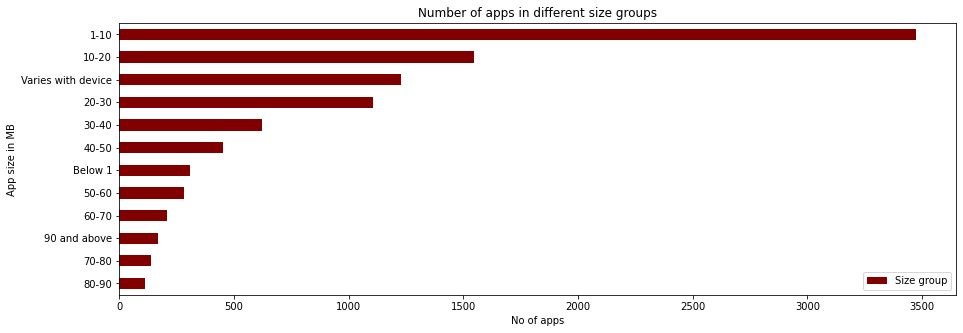

In [ ]:
# Number of apps in each size group

play_store_reading['Size group'].value_counts().plot.barh(figsize=(15,5), color='Maroon').invert_yaxis()
plt.title("Number of apps in different size groups")
plt.xlabel('No of apps')
plt.ylabel('App size in MB')
plt.legend()

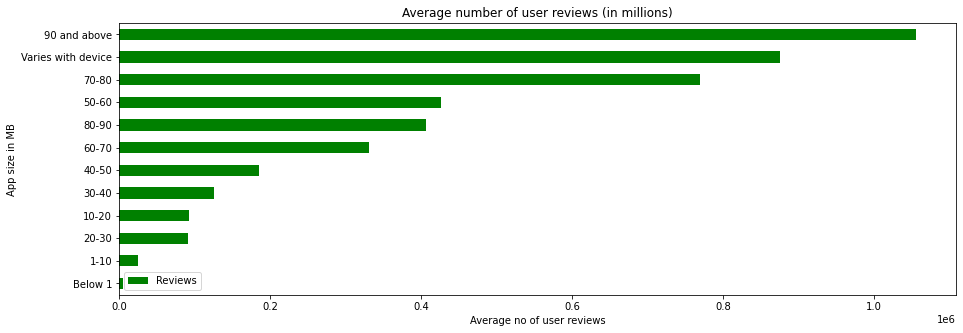

In [ ]:
# Number of average user reviews for each size group

play_store_reading.groupby('Size group')['Reviews'].mean().sort_values().plot.barh(figsize=(15,5), color = 'green')
plt.title("Average number of user reviews (in millions)")
plt.xlabel('Average no of user reviews')
plt.ylabel('App size in MB')
plt.legend()

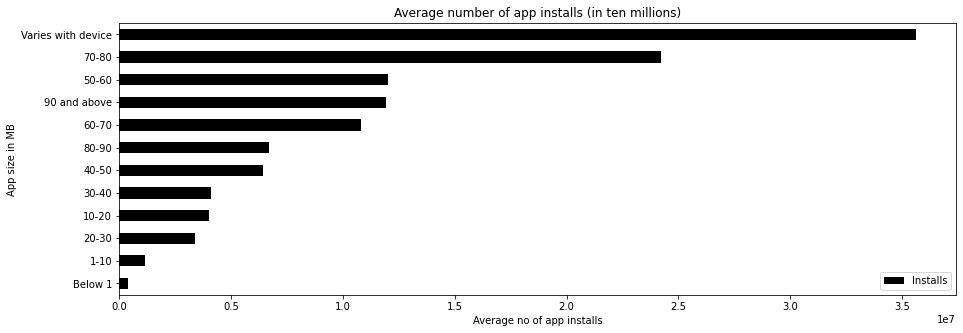

In [ ]:
# average number of app installs in each category

play_store_reading.groupby('Size group')['Installs'].mean().sort_values().plot.barh(figsize=(15,5), color='black')
plt.title("Average number of app installs (in ten millions)")
plt.xlabel('Average no of app installs')
plt.ylabel('App size in MB')
plt.legend()

**Analysis**

* The app have file sizes between 1 and 20 MB. 
* Many apps have sizes that change depending on the device. 
* The average number of app instals and user reviews are lower for apps with smaller file sizes.

# **Data visualization on User reviews:**

In [ ]:
# Primary Examination

user_review_dataframe.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [ ]:
# Review sentiment for each app

user_review_dataframe.groupby('App')['Sentiment'].value_counts()

App                               Sentiment
10 Best Foods for You             Positive     162
                                  Neutral       22
                                  Negative      10
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室  Positive      31
                                  Neutral        8
                                              ... 
Hotwire Hotel & Car Rental App    Neutral       11
                                  Negative       6
Housing-Real Estate & Property    Negative      10
                                  Positive       8
                                  Neutral        3
Name: Sentiment, Length: 2376, dtype: int64

**1. Apps with the highest number of positive reviews**

In [ ]:
# Positive Reviews

positive_reviews_dataframe = user_review_dataframe[user_review_dataframe['Sentiment'] == 'Positive']
positive_reviews_dataframe

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


Text(0.5, 1.0, 'Apps with the highest number of positive reviews')

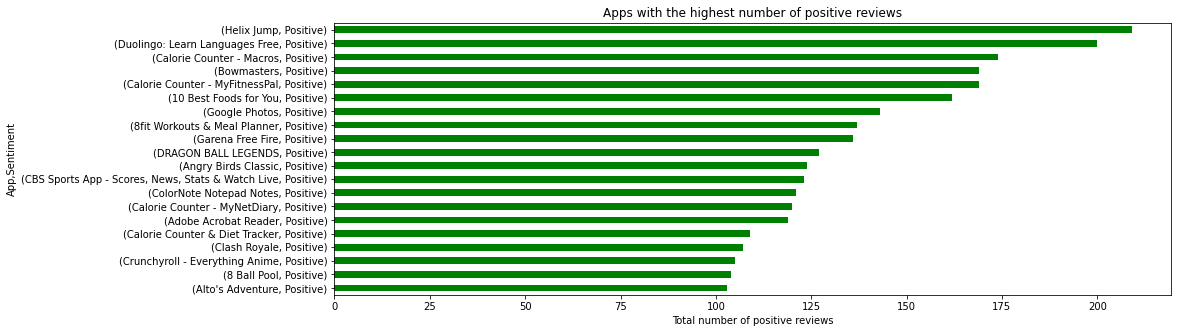

In [ ]:
positive_reviews_dataframe.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(15,5), color='green').invert_yaxis()
plt.xlabel('Total number of positive reviews')
plt.title('Apps with the highest number of positive reviews')

**2. Apps with the highest number of negative reviews**

In [ ]:
# Negative Review

negative_reviews_dataframe = user_review_dataframe[user_review_dataframe['Sentiment'] == 'Negative']
negative_reviews_dataframe

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


Text(0.5, 1.0, 'Apps with the highest number of negative reviews')

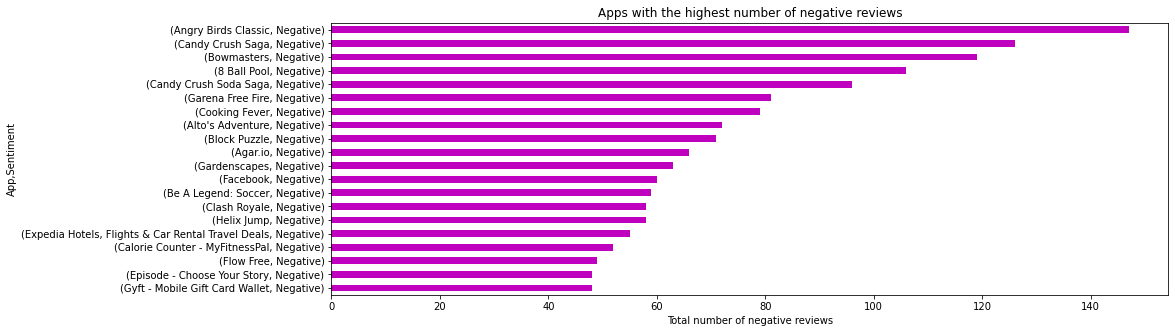

In [ ]:
negative_reviews_dataframe.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(15,5), color='m').invert_yaxis()
plt.xlabel('Total number of negative reviews')
plt.title('Apps with the highest number of negative reviews')

**3. Wordcloud on all the positive reviews in the dataset**

* The user reviews in this scenario can be visualised using word clouds to represent any textual data.
* A word gets bigger and bolder the more times it appears in a sentence. Less frequently used words have a lesser font height and are not bolded.
* As a result, one can use word clouds to acquire a bird's eye view of all the textual information in the dataset.
* In this situation, it can be made for each review in the dataset individually or for both good and bad reviews combined. Additionally, it may be made so that user reviews for each app are created separately.



**Let's make a word cloud that includes all of the dataset's reviews, both favourable and bad.**

In [ ]:
# Importing the required libraries

from wordcloud import WordCloud, STOPWORDS

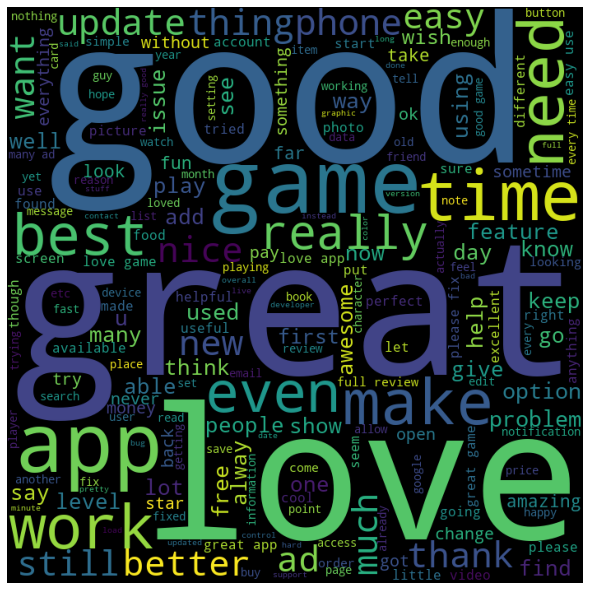

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in positive_reviews_dataframe.Translated_Review.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

**Analysis:** We may infer from the word cloud that users most frequently use the terms "wonderful," "love," "good," "time," and "game" when leaving positive app reviews.

**4. Wordcloud on all the negative reviews in the dataset**

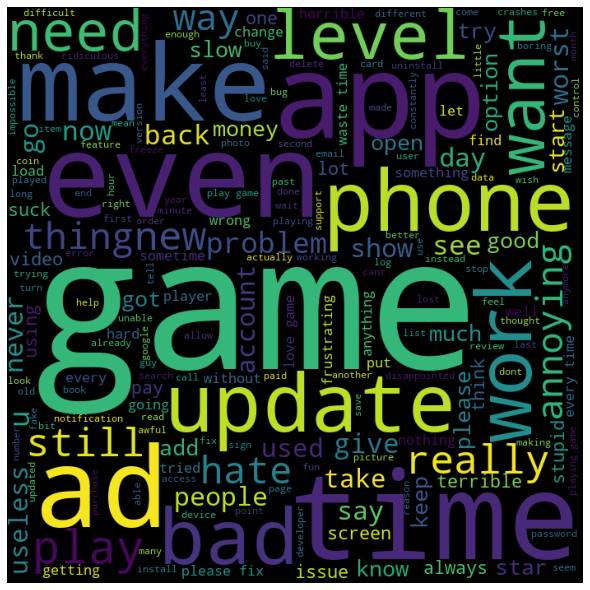

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in negative_reviews_dataframe.Translated_Review.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

**Analysis:** According to the word cloud created, the most often used words by users while leaving a negative review for an app are "time," "made," "game," "app," "even," "bad," "ad," and "phone."

**5. Wordcloud on all the reviews in the dataset**

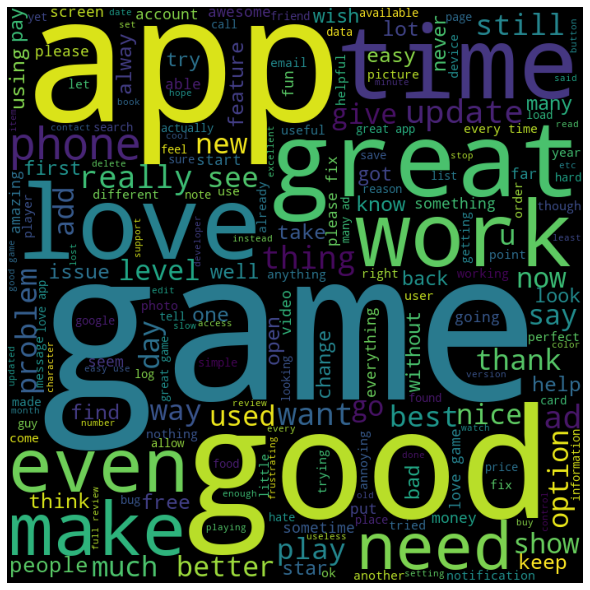

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in user_review_dataframe.Translated_Review.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

**Analysis:** We may infer from the word cloud that some of the most often used words by users while submitting a review for an app include "time," "good," "game," "app," "wonderful," "love," "work," "phone," etc.

# **Analysis Summary:**

* Percentage of applications that are free on App Store = ~92%
* Percentage of Apps do not have age restrictions = ~82%
* Most competitive category is : Family
* The genre with the most installations is :  Game
* The category with the highest average number of installed apps is: Communication
* Percentage of apps having the highest ratings = ~80%
* Applications that are free and have been installed more than one billion times = 20 Free Application
* The only paid application in the category with more than 10 million downloads is Minecraft, which has also generated the highest income solely from installation fees.
* The number of downloads and reviews are correlated positively. Between rating with installations and reviews, as well.
* The relationship between price and the rating, reviews, and installations is inverse.
* The category with the highest average installation cost for paid apps is: Finance
* Based on the quantity of reviews, the most downloaded app from the Play Store is: Facebook
* The average app size in the Google Play Store is 12 MB.
* The apps with the highest average number of installs are those whose size varies by device.
* The apps with the most average user reviews—i.e., those that are more well-liked than the rest—are those that are larger than 90 MB.
* The majority of reviews for Helix Jump are favorable, while the majority of those for Angry Birds Classic are unfavorable.

# **Conclusion:**

Following concepts were learned from this EDA project:

* Simple analysis of the raw data.
* Analysing the business KPIs for developing apps and coming up with a fix.
Handling the dataset's duplicate, incorrect, and NaN values, or cleaning the data.
* Utilising several Python modules and functions to clean and alter
data manipulation to produce various data insights.
* Creating a variety of representations to effectively explain the reader's conclusions and patterns while condensing the dataset's data.

To finish this EDA, these Python libraries were used:

* Pandas
* NumPy
* DateTime
* Matplotlib.Pyplot
* Seaborn
* Wordcloud
* Stopwords